# Compare $A_{sym}$ vs. $E_{min}$

I'm going to create a figure that compares the magnitude of anisotropy vs. energy threshold for the four data sets.

* Measured
* `ipol`
* `cgmf`
* `freya`

Each of the `datap/Asym.csv` spreadsheets were calculated using the script [`scripts/plot_Asym_energy_space.py`](scripts/plot_Asym_energy_space.py). 

Enable interactive plots

In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd

Move up a directory for easier access

In [3]:
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis\\compare'

In [4]:
os.chdir('..')

In [5]:
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis'

In [6]:
sys.path.append('../scripts')

In [7]:
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [8]:
angle_bin_edges = np.arange(10.01,181,10)
angle_bin_centers = bicorr_math.calc_centers(angle_bin_edges)

In [9]:
angle_bin_edges.shape

(18,)

# Find the other data

In [10]:
os.listdir('cgmf/datap')

['Asym_df.csv',
 'bhm_e.npz',
 'by_angle_e_df.csv',
 'det_df_e_filled.csv',
 'Esum_df.csv',
 'num_fissions.mat',
 'singles_e_df_filled.csv',
 'singles_hist.npz',
 'singles_hist_e_n.npz',
 'slices_analysis.npz',
 'sparse_bhm.npz']

In [11]:
Asym_df_meas = pd.read_csv(r'Cf072115_to_Cf072215b/datap/Asym_df.csv', index_col=0)
Asym_df_cgmf = pd.read_csv(r'cgmf/datap/Asym_df.csv', index_col=0)
Asym_df_freya = pd.read_csv(r'freya/datap/Asym_df.csv', index_col=0)
Asym_df_ipol = pd.read_csv(r'ipol/datap/Asym_df.csv', index_col=0)
Asym_df_ipol_noct = pd.read_csv(r'ipol_noct/datap/Asym_df.csv', index_col=0)

Which do I want to plot on the same distribution?

In [45]:
Asym_dfs=[Asym_df_meas,Asym_df_cgmf,Asym_df_freya,Asym_df_ipol,Asym_df_ipol_noct]
legends =['Experiment', 'CGMF',      'FREYA',      'PoliMi',    'PoliMi-No CT']
fmts   = ['x',          's',         'D',          'o',         '^']
colors = ['#5d269b',    '#dd673b',   '#80bc31',    '#3cbfe0',   '#4242f4']

to_plot = [0,1,2,3]

General plot settings

In [46]:
line_thickness = 1
ebar_width     = 3

# Plot as-is

These will be for Figure 7 in the paper.

In [47]:
Asym_df_cgmf.head()

,emin,emax,emin_real,emax_real,Asym,Asym_err,Asym_min,Asym_min_err
0,1.0,4,4.0,1.000,1.889400,0.090331,1.912181,0.102630
1,1.2,4,4.0,1.175,1.931323,0.095439,1.949794,0.105606
2,1.4,4,4.0,1.375,1.994774,0.108271,2.015480,0.120194
3,1.6,4,4.0,1.575,2.070092,0.136786,2.093130,0.142185
4,1.8,4,4.0,1.775,2.183410,0.172535,2.218285,0.178499


<IPython.core.display.Javascript object>


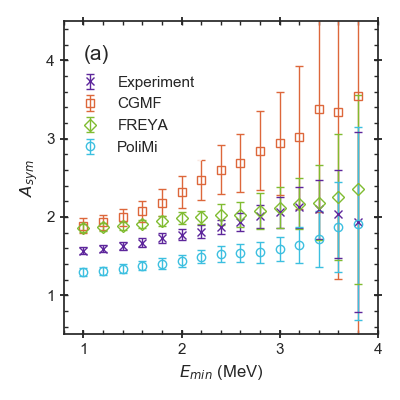

In [58]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

for i in to_plot:
    Asym_df = Asym_dfs[i]
    ax.errorbar(Asym_df['emin'],
                 Asym_df['Asym'],
                 yerr=Asym_df['Asym_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
ax.set_xlim([0.8,4])
ax.set_ylim([.5,4.5])
ax.set_xlabel('$E_{min}$ (MeV)')
ax.set_ylabel('$A_{sym}$')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

ax.text(1,4,'(a)', size=15, backgroundcolor='white')

leg = plt.legend([legends[i] for i in to_plot],bbox_to_anchor=(.46,.53))
leg.get_frame().set_edgecolor('w')

plt.tight_layout()
bicorr_plot.save_fig_to_folder('Asym_vs_Emin_compare',r'compare\fig')

# Compare simulation to experiment

In [29]:
def plot_calcs(Asym_df):
    x = Asym_df['emin']
    y = Asym_df['Asym']
    yerr = Asym_df['Asym_err']
    return x, y, yerr

<IPython.core.display.Javascript object>


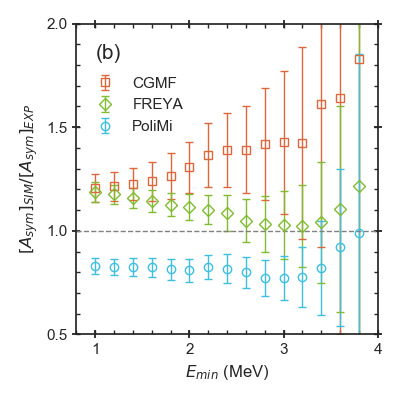

In [44]:
Asym_df_exp = Asym_dfs[0]
to_plot = [1,2,3]

fig = plt.figure(figsize=(4,4))
ax = plt.gca()

x, y_exp, yerr_exp = plot_calcs(Asym_df_exp)

for i in to_plot:
    Asym_df = Asym_dfs[i]
    x_sim, y_sim, yerr_sim = plot_calcs(Asym_df)
    y,yerr = bicorr_math.prop_err_division(y_sim,yerr_sim,y_exp,yerr_exp)    
    
    ax.errorbar(x, y, yerr=yerr,
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
leg = plt.legend([legends[i] for i in to_plot],bbox_to_anchor=(.4,.6))    
leg.get_frame().set_edgecolor('w')

plt.axhline(1.0,color='gray', linewidth=1,linestyle='--')
    
ax.set_xlim([0.8,4])
ax.set_ylim([.5,2])
ax.set_xlabel('$E_{min}$ (MeV)')
ax.set_ylabel(r'$\left[A_{sym}\right]_{SIM} / \left[A_{sym}\right]_{EXP}$')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(.5))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.text(1,1.83,'(b)', size=15, backgroundcolor='white')

plt.tight_layout()
bicorr_plot.save_fig_to_folder('Asym_vs_Emin_diff',r'compare\fig')

In [18]:
os.getcwd()

'C:\\Users\\pfschus\\Box Sync\\Projects\\fnpc\\analysis'

# Try $A_{sym} = W(180)/W_{min}$

Should we be comparing to the data at 90 degrees, or the minimum W values?

In [17]:
Asym_df

,emin,emax,emin_real,emax_real,Asym,Asym_err,Asym_min,Asym_min_err
0,1.0,4,4.0,1.000,1.298544,0.048786,1.373203,0.047016
1,1.2,4,4.0,1.175,1.311801,0.050688,1.387924,0.047769
2,1.4,4,4.0,1.375,1.340514,0.055990,1.422138,0.054524
3,1.6,4,4.0,1.575,1.377363,0.059335,1.460167,0.061494
4,1.8,4,4.0,1.775,1.403279,0.066703,1.492027,0.071245
5,2.0,4,4.0,1.975,1.435378,0.080158,1.532264,0.081155
6,2.2,4,4.0,2.175,1.492052,0.083743,1.586427,0.084978
7,2.4,4,4.0,2.375,1.528561,0.105867,1.622493,0.108362
8,2.6,4,4.0,2.575,1.543597,0.115115,1.647768,0.137667
9,2.8,4,4.0,2.775,1.547370,0.137527,1.660936,0.168662


<IPython.core.display.Javascript object>


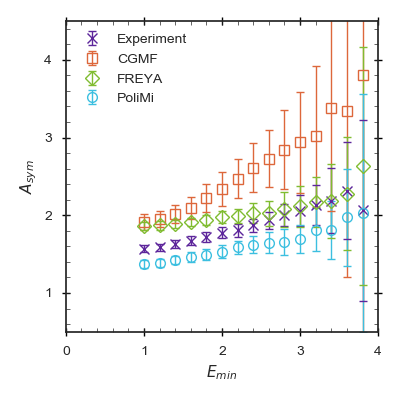

In [18]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

for i in to_plot:
    Asym_df = Asym_dfs[i]
    ax.errorbar(Asym_df['emin'],
                 Asym_df['Asym_min'],
                 yerr=Asym_df['Asym_min_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
ax.set_xlim([0,4])
ax.set_ylim([.5,4.5])
ax.set_xlabel('$E_{min}$')
ax.set_ylabel('$A_{sym}$')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

plt.legend([legends[i] for i in to_plot])
plt.tight_layout()

In [18]:
bicorr_plot.save_fig_to_folder('Asym_min_vs_Emin_compare',r'compare\fig')

# Try plotting everything together

<IPython.core.display.Javascript object>


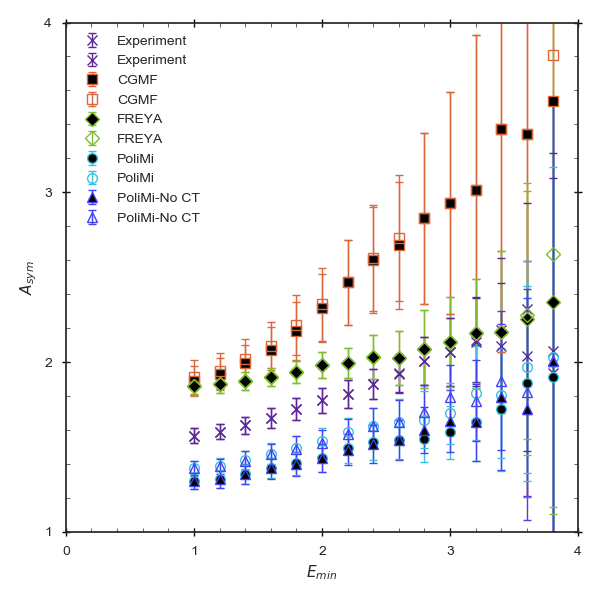

In [19]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

for i in to_plot:
    Asym_df = Asym_dfs[i]
    ax.errorbar(Asym_df['emin'],
                 Asym_df['Asym'],
                 yerr=Asym_df['Asym_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='k',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
    ax.errorbar(Asym_df['emin'],
                 Asym_df['Asym_min'],
                 yerr=Asym_df['Asym_min_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
ax.set_xlim([0,4])
ax.set_ylim([1,4])
ax.set_xlabel('$E_{min}$')
ax.set_ylabel('$A_{sym}$')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))

plt.legend([legends[i] for i in np.repeat(to_plot,2).tolist()])
plt.tight_layout()

In [27]:
np.repeat(to_plot,2).tolist()

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]